Define `ufunc` and a Gaussian filter on `ScalarField` and `VectorField`
=======================================================================

In [1]:
import sys
sys.path.append("/home/smets/far/PHARE/pyphare/")
import os
import subprocess
import pyphare
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
from pyphare.core.operators import dot, cross, sqrt, modulus, grad, filter
import numpy as np
%matplotlib inline

In [2]:
Te = 0.2
run_path = "/home/smets/far/farMe/uFunc"+"/"+f"wp_{Te}"+"/"
files = os.listdir(run_path)

In [3]:
if 'ions_charge_density.h5' not in files :
    subprocess.call(['/usr/bin/python3', run_path+'wp1.py'])

In [4]:
print(files)

['ions_charge_density.h5', 'ions_bulkVelocity.h5', 'EM_E.h5', 'EM_B.h5', 'ions_pop_protons_domain.h5', 'wp1.py']


In [5]:
run  = Run(run_path)
time = 50.0

# Operation on `ScalarField`

In [6]:
N = run.GetNi(time)
P = run.GetPe(time)  # , all_primal=True)
type(P)

pyphare.pharesee.hierarchy.scalarfield.ScalarField

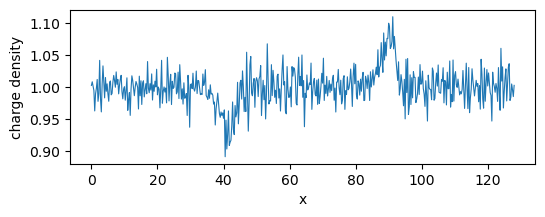

In [7]:
fig, ax = plt.subplots(figsize=(6,2))

N.plot(qty='value', ax=ax, ls='solid', lw=0.8, color='tab:blue', ylabel='charge density')

In [8]:
n = filter(N, sigma=6)

nb_ghosts (2) < sigma (6) : your gaussian filter might be dirty


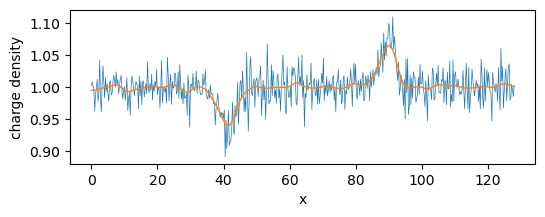

In [9]:
fig, ax = plt.subplots(figsize=(6,2))

N.plot(qty='value', ax=ax, ls='solid', lw=0.5, color='tab:blue', ylabel='charge density')
n.plot(qty='value', ax=ax, ls='solid', lw=1.0, color='tab:orange', ylabel='charge density')

In [10]:
for ilvl, lvl in N.levels(time).items():
    for patch in lvl.patches:
        names = list(patch.patch_datas.keys())
        print('names      : {}'.format(names))
        print("id         : {}".format(patch.id))
        print("box        : {}".format(patch.patch_datas[list(patch.patch_datas.keys())[0]].box))
        print(dir(patch.patch_datas[list(patch.patch_datas.keys())[0]]))
        for name in names:
            pdata = patch.patch_datas[name]
            # print("name       : {}".format(name))
            print("size [{}]  : {}   -   {}".format(name, pdata.size, pdata.centerings))
        print(" --- ")
        break

names      : ['value']
id         : p0#0
box        : Box([0],[511])
['__class__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_x', '_y', '_z', 'box', 'centerings', 'compare', 'dataset', 'dl', 'field_name', 'ghost_box', 'ghosts_nbr', 'layout', 'meshgrid', 'name', 'ndim', 'offset', 'origin', 'primal_directions', 'quantity', 'select', 'size', 'x', 'y', 'z']
size [value]  : [517]   -   ['primal']
 --- 
